# training

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

x_train = tf.reshape(x_train, (-1, 32*32*3))
x_test  = tf.reshape(x_test, (-1, 32*32*3))

x_train = x_train/255.0
x_test  = x_test/255.0

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(50000, 3072)
(10000, 3072)
(50000, 1)
(10000, 1)


In [7]:
# create model
model = keras.Sequential()
model.add(keras.Input(shape=(3072,)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               786688    
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 986,634
Trainable params: 986,634
Non-trainable params: 0
_________________________________________________________________


In [8]:
# optimizer and loss
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    batch_size=2048, epochs=200, verbose=2)

Epoch 1/200
25/25 - 3s - loss: 2.1091 - sparse_categorical_accuracy: 0.2209 - val_loss: 1.9394 - val_sparse_categorical_accuracy: 0.2809 - 3s/epoch - 134ms/step
Epoch 2/200
25/25 - 2s - loss: 1.8648 - sparse_categorical_accuracy: 0.3323 - val_loss: 1.8107 - val_sparse_categorical_accuracy: 0.3582 - 2s/epoch - 90ms/step
Epoch 3/200
25/25 - 2s - loss: 1.7618 - sparse_categorical_accuracy: 0.3686 - val_loss: 1.7248 - val_sparse_categorical_accuracy: 0.3791 - 2s/epoch - 89ms/step
Epoch 4/200
25/25 - 2s - loss: 1.7367 - sparse_categorical_accuracy: 0.3788 - val_loss: 1.6652 - val_sparse_categorical_accuracy: 0.4002 - 2s/epoch - 89ms/step
Epoch 5/200
25/25 - 2s - loss: 1.6510 - sparse_categorical_accuracy: 0.4091 - val_loss: 1.6708 - val_sparse_categorical_accuracy: 0.3981 - 2s/epoch - 89ms/step
Epoch 6/200
25/25 - 2s - loss: 1.6228 - sparse_categorical_accuracy: 0.4196 - val_loss: 1.5771 - val_sparse_categorical_accuracy: 0.4378 - 2s/epoch - 87ms/step
Epoch 7/200
25/25 - 2s - loss: 1.5644 -

Epoch 52/200
25/25 - 2s - loss: 0.8623 - sparse_categorical_accuracy: 0.6947 - val_loss: 1.4807 - val_sparse_categorical_accuracy: 0.5188 - 2s/epoch - 92ms/step
Epoch 53/200
25/25 - 2s - loss: 0.8397 - sparse_categorical_accuracy: 0.7024 - val_loss: 1.4499 - val_sparse_categorical_accuracy: 0.5243 - 2s/epoch - 91ms/step
Epoch 54/200
25/25 - 2s - loss: 0.8298 - sparse_categorical_accuracy: 0.7046 - val_loss: 1.4743 - val_sparse_categorical_accuracy: 0.5272 - 2s/epoch - 92ms/step
Epoch 55/200
25/25 - 2s - loss: 0.8093 - sparse_categorical_accuracy: 0.7149 - val_loss: 1.5001 - val_sparse_categorical_accuracy: 0.5158 - 2s/epoch - 91ms/step
Epoch 56/200
25/25 - 2s - loss: 0.8066 - sparse_categorical_accuracy: 0.7159 - val_loss: 1.5569 - val_sparse_categorical_accuracy: 0.5179 - 2s/epoch - 92ms/step
Epoch 57/200
25/25 - 2s - loss: 0.8254 - sparse_categorical_accuracy: 0.7093 - val_loss: 1.4743 - val_sparse_categorical_accuracy: 0.5264 - 2s/epoch - 93ms/step
Epoch 58/200
25/25 - 2s - loss: 0.

Epoch 103/200
25/25 - 2s - loss: 0.3656 - sparse_categorical_accuracy: 0.8783 - val_loss: 2.1693 - val_sparse_categorical_accuracy: 0.5112 - 2s/epoch - 85ms/step
Epoch 104/200
25/25 - 2s - loss: 0.3552 - sparse_categorical_accuracy: 0.8839 - val_loss: 2.2843 - val_sparse_categorical_accuracy: 0.4968 - 2s/epoch - 90ms/step
Epoch 105/200
25/25 - 2s - loss: 0.3860 - sparse_categorical_accuracy: 0.8664 - val_loss: 2.2377 - val_sparse_categorical_accuracy: 0.5109 - 2s/epoch - 90ms/step
Epoch 106/200
25/25 - 2s - loss: 0.3513 - sparse_categorical_accuracy: 0.8830 - val_loss: 2.2703 - val_sparse_categorical_accuracy: 0.5064 - 2s/epoch - 91ms/step
Epoch 107/200
25/25 - 2s - loss: 0.3302 - sparse_categorical_accuracy: 0.8923 - val_loss: 2.2756 - val_sparse_categorical_accuracy: 0.5089 - 2s/epoch - 91ms/step
Epoch 108/200
25/25 - 2s - loss: 0.3333 - sparse_categorical_accuracy: 0.8907 - val_loss: 2.2947 - val_sparse_categorical_accuracy: 0.5128 - 2s/epoch - 90ms/step
Epoch 109/200
25/25 - 2s - l

Epoch 154/200
25/25 - 2s - loss: 0.1263 - sparse_categorical_accuracy: 0.9633 - val_loss: 3.4911 - val_sparse_categorical_accuracy: 0.5015 - 2s/epoch - 90ms/step
Epoch 155/200
25/25 - 2s - loss: 0.1291 - sparse_categorical_accuracy: 0.9620 - val_loss: 3.4386 - val_sparse_categorical_accuracy: 0.4963 - 2s/epoch - 90ms/step
Epoch 156/200
25/25 - 2s - loss: 0.1446 - sparse_categorical_accuracy: 0.9537 - val_loss: 3.5424 - val_sparse_categorical_accuracy: 0.5030 - 2s/epoch - 87ms/step
Epoch 157/200
25/25 - 2s - loss: 0.1371 - sparse_categorical_accuracy: 0.9569 - val_loss: 3.5056 - val_sparse_categorical_accuracy: 0.4914 - 2s/epoch - 82ms/step
Epoch 158/200
25/25 - 2s - loss: 0.1261 - sparse_categorical_accuracy: 0.9626 - val_loss: 3.5152 - val_sparse_categorical_accuracy: 0.5028 - 2s/epoch - 91ms/step
Epoch 159/200
25/25 - 2s - loss: 0.1076 - sparse_categorical_accuracy: 0.9707 - val_loss: 3.5901 - val_sparse_categorical_accuracy: 0.4923 - 2s/epoch - 89ms/step
Epoch 160/200
25/25 - 2s - l

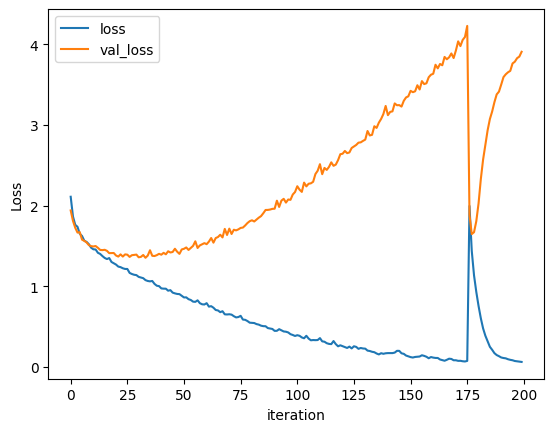

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

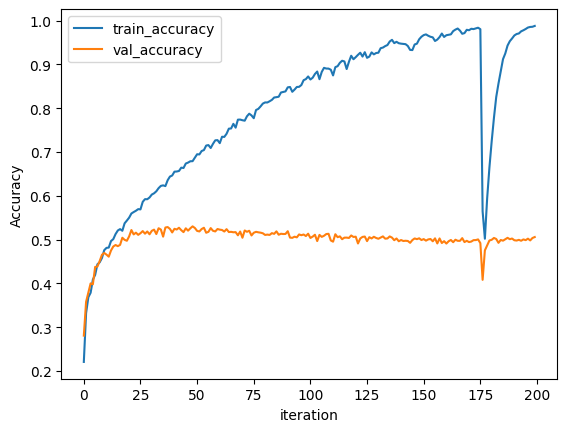

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [13]:
import matplotlib.pyplot as plt
%matplotlib qt

plt.plot(history.history['sparse_categorical_accuracy'][:170], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'][:170], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()